# Exploratory Data Analysis of Login Times

In [23]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [4]:
path = "/Users/jasonzhou/Documents/GitHub/Portfolio/SpringBoard/Exercises/ultimate_challenge"
os.chdir(path)

loginsdata = pd.read_json("logins.json")

In [5]:
loginsdata

login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]

In [8]:
loginsdata['dummy'] = 1

Starting from the start to end of the data, we'll count how many logins there were in buckets of 15 minute intervals, from 01/01 all the way to 04/13.

In [67]:
loginintervals = loginsdata.resample('15T', on='login_time').dummy.sum()
loginintervals

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: dummy, Length: 9788, dtype: int64

In [106]:
# Determine weekends, 01/01/1970 was on a Thursday, so we fastforward 16 + 96 data points to get to the first Saturday
# in the data

weekends = []
weekcount = 0
for i in range(112, len(loginintervals)):   
    if weekcount < 2 * 96:
        weekends.append(i)
    weekcount += 1
    if weekcount > (7 * 96):
        weekcount = 0

Let's go ahead and graph this to see if we can draw any insights from it.

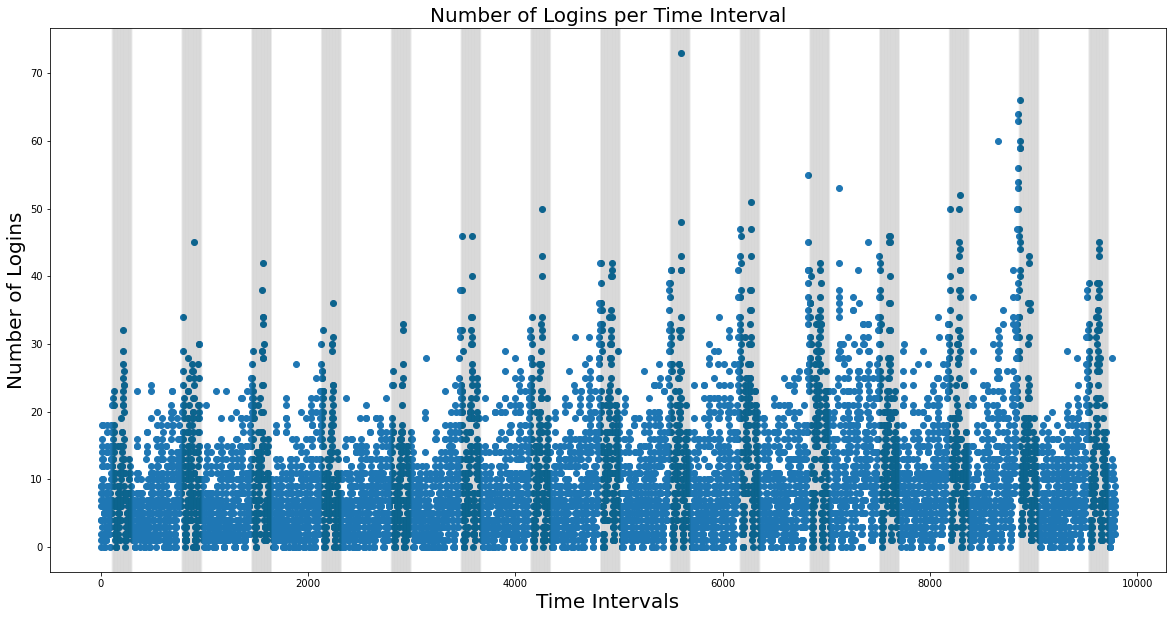

In [113]:
_ = plt.figure(figsize=(20,10))
_ = plt.xlabel("Time Intervals", fontsize = 20)
_ = plt.ylabel("Number of Logins", fontsize = 20)
_ = plt.title("Number of Logins per Time Interval", fontsize = 20)
_ = plt.scatter(range(len(loginintervals)), loginintervals)

# plot vertical lines that represent weekends
for wk in weekends:
    plt.axvline(x=wk, color='k', alpha = 0.01)

Looks like our preemptive work of marking the weekends paid off, as all of our spikes in the data happen excactly during weekends. this is surely valuable insight.

It helps to see the outliers and general spikes in logins, the bottom of the graph is too cluttered to make any sense of it. It is however interesting to see that there can be up to more than 70 logins within just a 15 minute time window. We can also see that the overall number of logins steadily increases as the months pass. Let's now separate by month, and separate these data points into 4 scatterplots for each month of data that we have. 

In [90]:
# 16 + 30 * 96 = 2896
jandata = loginintervals[0:2896]

# 2896 + 28 * 96 = 5584
febdata = loginintervals[2897:5584]

# 5584 + 31 * 96 = 8560
mardata = loginintervals[5585:8560]

aprdata = loginintervals[8561:]

Text(0.5, 1.0, 'April')

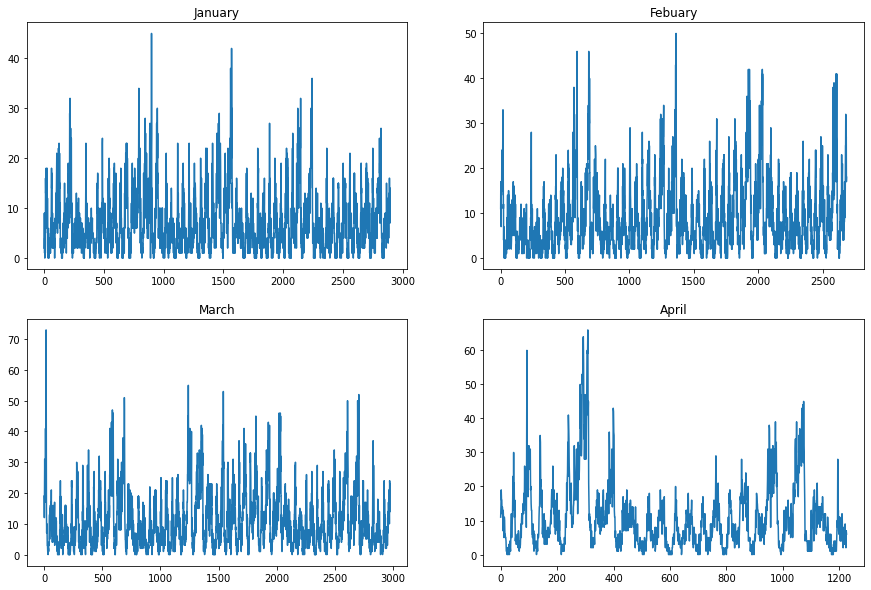

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(range(len(jandata)), jandata)
axs[0, 0].set_title('January')
axs[0, 1].plot(range(len(febdata)), febdata)
axs[0, 1].set_title('Febuary')
axs[1, 0].plot(range(len(mardata)), mardata)
axs[1, 0].set_title('March')
axs[1, 1].plot(range(len(aprdata)), aprdata)
axs[1, 1].set_title('April')

We can see that the graphs have similar looking trends, with April's looking slightly different only because we only have 13 days of data for it. January and Febuary have similar spikes of logins at the same time while March's look slightly different. 

With there being 96 15-minute intervals within a day, every 100th mark roughly represents a day worth of data which means that every 700 data points represents a week. Between the peaks of the graphs exist roughly gaps of 500, which indicates that logins increase on the weekend compared to during the week. 


Let's get a look at logins within just a single day. We'll be taking two approaches here, taking the total amount of logins within a time interval across all days, and the average a ount of logins within a time interval.

In [42]:
datelist = pd.date_range(start = '1970-01-01', periods=96, freq = '15T').tolist()
intervals = []

for date in datelist:
    intervals.append(date.strftime("%H:%M"))

In [48]:
counter = intervals.index('20:00')
logins = [0] * 96
numlogins = [0] * 96

for logininterval in loginintervals:
    logins[counter] += logininterval
    numlogins[counter] += 1
    counter += 1
    if counter == 96:
        counter = 0

In [50]:
meanlogins = [0] * 96
for i in range(96):
    meanlogins[i] = logins[i] / numlogins[i]

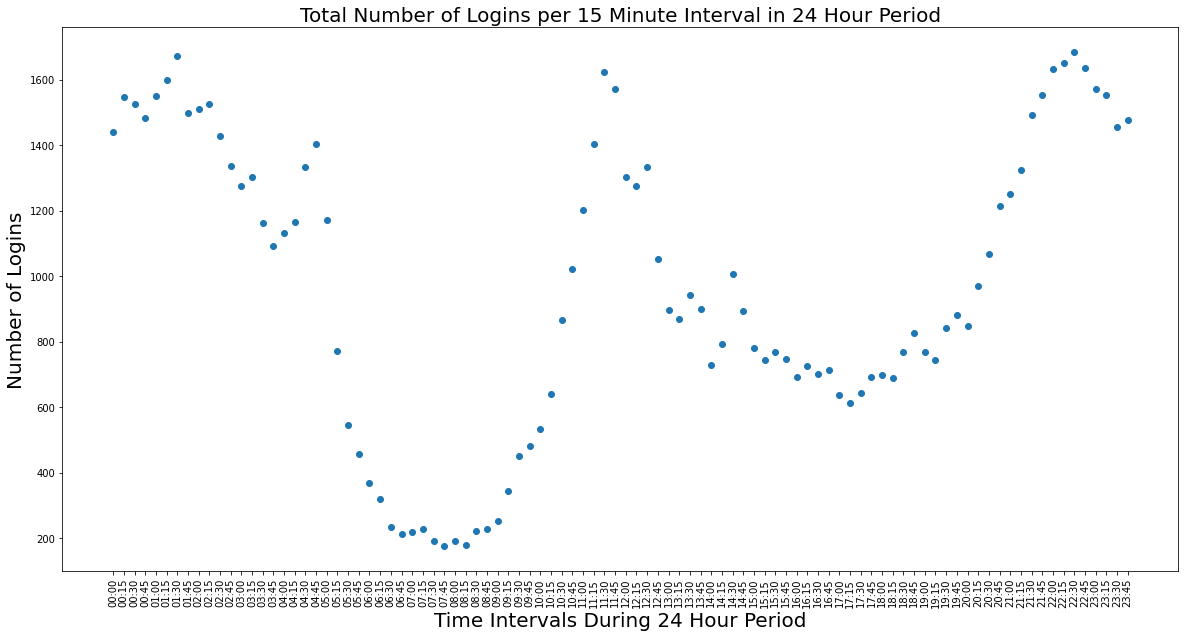

In [60]:
_ = plt.figure(figsize=(20,10))
_ = plt.xlabel("Time Intervals During 24 Hour Period", fontsize = 20)
_ = plt.ylabel("Number of Logins", fontsize = 20)
_ = plt.title("Total Number of Logins per 15 Minute Interval in 24 Hour Period", fontsize = 20)
_ = plt.scatter(intervals, logins)
_ = plt.xticks(rotation=90)

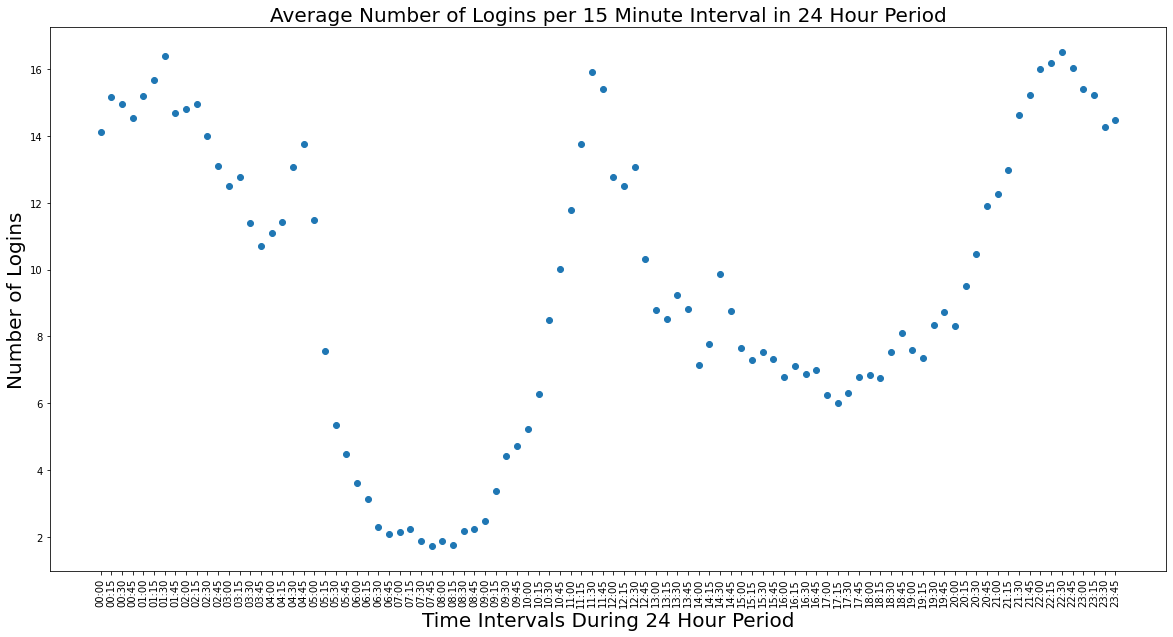

In [59]:
_ = plt.figure(figsize=(20,10))
_ = plt.xlabel("Time Intervals During 24 Hour Period", fontsize = 20)
_ = plt.ylabel("Number of Logins", fontsize = 20)
_ = plt.title("Average Number of Logins per 15 Minute Interval in 24 Hour Period", fontsize = 20)
_ = plt.scatter(intervals, meanlogins)
_ = plt.xticks(rotation=90)

These graphs look pretty much identical. We see that logins are highest at night and into the night as well, and then nearing noon. Logins are at the lowest during early morning, and experience another low in the late afternoon to early evening. 